### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Graphs and Graph Theory

# Lecture 5: Paths, Trees and Algorithms

Sequences of interconnected edges in a  graph are called **paths**,
leading to notions of **connectivity** and **distance**.
A **tree** is a particularly useful kind of connected graph,
that is frequently used as a data structure in Computer Science.

Many questions on networks concerning distance and connectivity can
be answered by a versatile strategy called **Breadth First Search (BFS)**
which effectively grows a **spanning tree** of the underlying graph.

We will study **trees** and some classical algorithms for tree traversal.
A network has the structure of a tree when it is of a hierarchical nature,
like an [ancestry chart](https://en.wikipedia.org/wiki/Pedigree_chart)
or a **river network**.

![A River Network](images/rivers.jpg)

[Image from [EPA Maps](https://gis.epa.ie/EPAMaps/)]

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Paths

The fundamental notion of **connectivity** in a network is closely
related to the notion of **paths** in a graph.

<div class="alert alert-danger">
<b>Definitions.</b>  
    <ul>
        <li> 
            A <b>path</b> in a graph $G = (X, E)$ is a sequence of nodes, 
            where any pair of consecutive nodes in the sequence is (linked by)
            an edge in $E$.
        </li>
        <li>
            Such a path can have repeated nodes.  If it doesn't, the path is called a <b>simple path</b>.
        </li>
        <li>
            The <b>length</b> of a path is the number of edges it involves
            (that is the number of nodes minus $1$).
        </li>
        <li>
            At each vertex $x \in X$, there is a unique path of length $0$, 
            the <b>empty path</b>, consisting of vertex $x$ only.
        </li>
        <li>
            A <b>cycle</b> is a path of length at least $3$ that is a simple path,
            except for the first and the last node being the same.
        </li>
    </ul>
</div>

In [2]:
nodes = 'ABCDEFGHIJKLM'

In [3]:
G = nx.Graph()

In [4]:
G.add_nodes_from(nodes)

In [5]:
list(G.nodes())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

In [6]:
nodes = 'ABCDEFGHIJKLM'
edges = [
    'AB', 'CE', 'FG', 'FH', 'GI', 'GJ', 'HJ', 'HL', 'HM', 
    'IK', 'JK', 'KL', 'LM'
]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

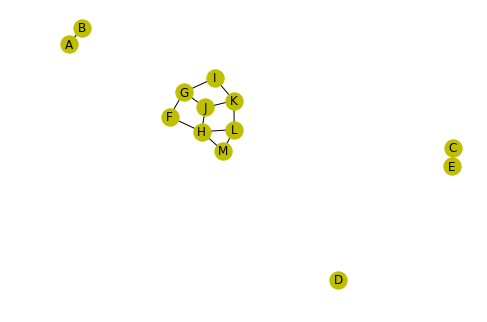

In [7]:
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(G, **opts)

* $(F, G, I)$ is a path in the graph above, and $(H, J, K, L, H)$ is a cycle.

* A cycle in a simple graph provides, for any two nodes on that
cycle, (at least) two different paths from one to the other.

* Note that each edge (and node) of the 1970 Internet graph belongs to
a cycle.  This makes the other way around the cycle an alternative
route in case one of the edges should fail.

* (In a *directed* network, paths are directed, too.
A path from a vertex $x$ to a vertex $y$ is
a sequence of vertices $x = x_0, x_1, \dots, x_k = y$
such that, for any $i = 1, \dots, k$, there is
an edge from $x_{i-1}$ to $x_i$ in the graph.)



## Connected Components

Communication and transportation networks tend to be connected, as
this is their main purpose: to connect.

<div class="alert alert-danger">
<b>Definition.</b> 
    <ul>
        <li>A simple graph is <b>connected</b> if, for
every pair of nodes, there is a path between them.
        </li>
        <li>
If a graph is not connected, it naturally breaks into pieces,
its <b>connected components</b>.
        </li>
    </ul>
</div>

* The connected components of the graph below are the
node sets $\{A, B\}$, $\{C, E\}$, $\{D\}$, and $\{F,G,H,I,J,K,L,M\}$.
* Note that a component can consist of a single node only.

In [8]:
list(nx.connected_components(G))

[{'A', 'B'}, {'C', 'E'}, {'D'}, {'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'}]

**Note.** 
The relation 'there is a **path** from $x$ to $y$ on the node set $X$ of a
graph is the **transitive closure** of the graph relation 'there is an
**edge** between $x$ and $y$'.  It is 

* **reflexive** (as each node $x$ is
connected to itself by the zero length path starting and ending at
$x$), 

* **symmetric** (as a path from $x$ to $y$ can be used backwards as
a path from $y$ to $x$), 

* and **transitive** (as a path from $x$ to $y$ and
a path from $y$ to $z$ together make up a path from $x$ to $z$), 

hence
an **equivalence relation**.
The connected components of the graph are
the parts (equivalence classes) of the corresponding **partition** of $X$.

##  Trees

* A graph is called **acyclic** if it does not contain any cycles.

<div class="alert alert-danger">
    <ul>
        <li>
    A <b>tree</b> is a (simple) graph that is <b>connected</b> and <b>acyclic</b>.
        </li>
        <li>
            A <b>forest</b> is a graph whose connected components are all trees.
        </li>
    </ul>         
</div>

In other words, between any two vertices in a tree there is **exactly one simple path**.

Trees can be characterized in many different ways.

<div class="alert alert-warning">

**Theorem.**  Let $G = (X, E)$ be a (simple) graph of order $n = |X|$
and size $m = |E|$.
Then the following are equivalent:

* $G$ is a tree (i.e. acyclic and connected);

* $G$ is connected and $m = n-1$;

* $G$ is a minimally connected graph (i.e., removing any edge will disconnect $G$);

* $G$ is acyclic and $m = n-1$;

* $G$ is a maximally acyclic graph (i.e., adding any edge will introduce a cycle in $G$).
</div>

## Ordered and Rooted Trees

In some applications it is useful to specify additional attributes of a tree.

* A **rooted tree** is a tree in which one vertex has been designated the **root**.

* In a rooted tree, except for the root itself, each vertex $x$ has a unique **parent**:
  the unique neighbor that lies on the unique simple path from $x$ to the root.
  
* The **children** of vertex $x$ are all thie nodes it is the parent of.

* In an **ordered rooted tree** (ORT) an explicit order is specified on the children of each node,
corresponding to an embedding ot the tree in the plane.


Algebraic formulas, computer programs can conveniently be represented by ORTs known as [**abstract syntax trees**]( https://en.wikipedia.org/wiki/Abstract_syntax_tree).

## Random Trees

<div class="alert alert-danger">
    <b>Theorem (Cayley's Formula).</b>
    There are exactly $n^{n-2}$ distinct (labelled) trees on the $n$-element vertex set 
    $X = \{0, 1, 2, \dots, n-1\}$, if $n > 1$.
</div>

There is one (trivial) tree on $1$ vertex, but there is no tree on $0$ vertices.  Some values for $n > 1$:
    

In [9]:
domain = range(2, 10)
pd.DataFrame([n**(n-2) for n in domain], index=domain, columns=[""], dtype=int).transpose()

,2,3,4,5,6,7,8,9
,1,3,16,125,1296,16807,262144,4782969


**Proof.** Each tree on $X = \{0, 1, 2, \dots, n-1\}$ corresponds to a unique sequence of
$n-2$ elements of $X$, its [**Prüfer Code**](https://en.wikipedia.org/wiki/Pr%C3%BCfer_sequence).

In [10]:
n = 10
T = nx.random_tree(n)

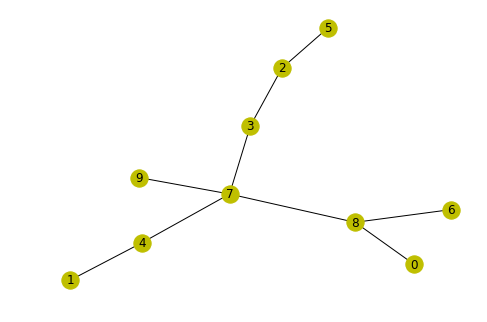

In [11]:
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(T, **opts)

In [12]:
degrees = [T.degree(x) for x in T]
degrees

[1, 1, 2, 2, 2, 1, 1, 4, 3, 1]

How to determine the Prüfer code of a tree $T$ (destructively):

* Find the smallest leaf $x$
* Record the label $y$ of its unique neighbor
* Remove $x$ (and the edge $x - y$) from $T$
* Repeat until $T$ has only $2$ nodes left.

In [13]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

In [14]:
code = [pruefer_node(T) for k in range(n-2)]
code

[8, 4, 7, 2, 3, 7, 8, 7]

This process destroys the tree `T` almost completely.

In [15]:
print(T.nodes())
print(T.edges())

[7, 9]
[(7, 9)]


In [16]:
def pruefer_code(tree):
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

Luckily, the tree can be reconstructed from its Prüfer code.

<div class="alert alert-info">
<b>Fact:</b> The degree of node $x$ is $1$ plus the number of entries $x$ in the Prüfer code of $T$.
    </div>

In [17]:
ddd = [1 for k in range(n)]
for k in code:
    ddd[k] += 1
ddd

[1, 1, 2, 2, 2, 1, 1, 4, 3, 1]

In [18]:
degrees

[1, 1, 2, 2, 2, 1, 1, 4, 3, 1]

In [19]:
ddd == degrees

True

How to restore the tree from its Prüfer code:

* Start with a graph with vertex set $X = \{0, 1, 2, \dots, n-1\}$ (and no edges yet).
* Compute the desired node degrees (defects) from the code.
* For each node $y$ in the code find the smallest degree $1$ node $x$ and
add the edge $x - y$, then decrease the defects of both $x$ and $y$ by $1$.
* Finally, connect the remaining $2$ nodes of defect $1$ by an edge.

[8, 4, 7, 2, 3, 7, 8, 7]


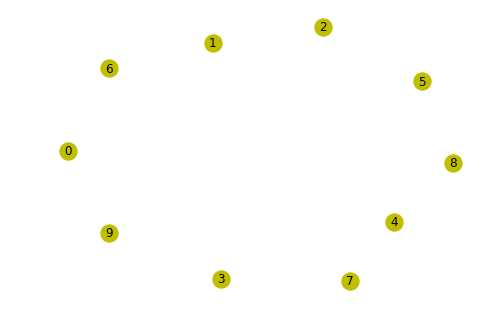

In [20]:
T = nx.empty_graph(n)
nx.draw(T, **opts)
print(code)

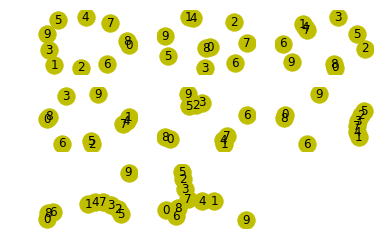

In [21]:
# repeat n-2 times:
for i in range(n-2):
    plt.subplot(n//3, 3, i+1)
    y = code.pop(0)
    x = ddd.index(1)
    # print(ddd, "Added edge", x, "--", y)
    T.add_edge(x, y)
    ddd[x] -= 1;  ddd[y] -= 1
    nx.draw(T, **opts)

Add the final edge:

[7, 9]


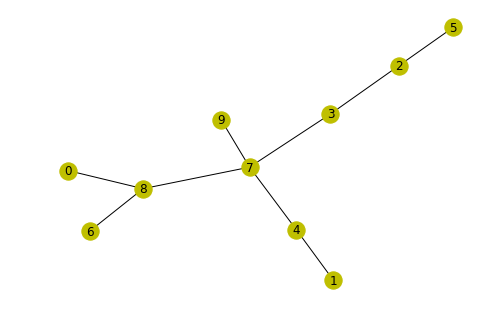

In [22]:
e = [x for x in range(n) if ddd[x] == 1]
T.add_edge(*e)
print(e)
nx.draw(T, **opts)

Turn the entire procedure into a `python` function:

In [23]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    defects = [1 for x in tree]
    for y in code:
        defects[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if defects[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    defects[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if defects[x] == 1]
    tree.add_edge(*e)
    
    return tree

* We can now construct a random tree on $n$ nodes from a random Prüfer code of length $n-2$.

In [24]:
from random import choice

In [25]:
code = [choice(range(n)) for k in range(n-2)]
code

[7, 5, 7, 9, 4, 7, 9, 3]

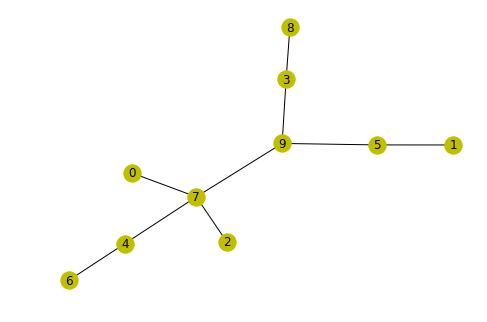

In [26]:
tree = tree_pruefer(code)
nx.draw(tree, **opts)

Finally, we wrap this up into a `python` function `random_tree`.

In [27]:
def random_tree(n):
    code = [choice(range(n)) for k in range(n-2)]
    return tree_pruefer(code)

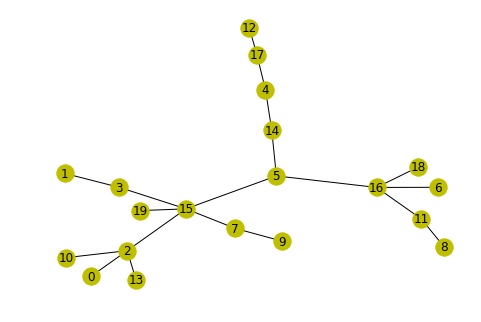

In [28]:
T = random_tree(20)
nx.draw(T, **opts)

Of course, `networkx` has its own random trees:

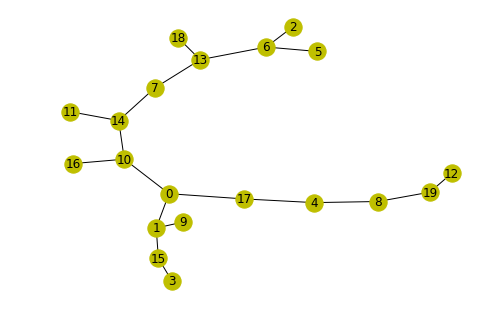

In [29]:
T = nx.random_tree(20)
nx.draw(T, **opts)

## Depth First Search

[DFS](https://en.wikipedia.org/wiki/Depth-first_search)
and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search)
are simple but efficient tree (and graph) traversal algorithms.

**DFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $S \gets (x)$
* while $S \neq \emptyset$:
* &nbsp; $y \gets S$.pop() 
* &nbsp; visit($y$) 
* &nbsp; $S$.push($y$.children)

Here $S$ is a [**stack**]( (https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) (LIFO):
$S$.pop() yields the **newest** entry.

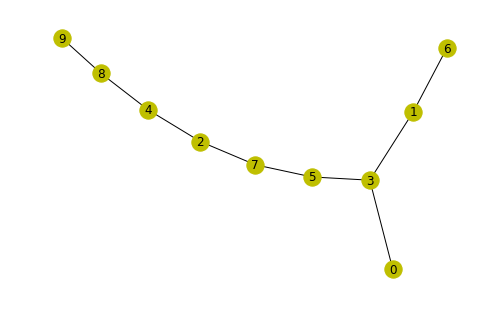

In [30]:
T = random_tree(n)
nx.draw(T, **opts)

In [31]:
TT = T.copy()
x = 0
stack = [x]
while len(stack) > 0:
    y = stack.pop()
    stack.extend(TT[y])
    TT.remove_node(y)
    print(y, stack)


0 [3]
3 [1, 5]
5 [1, 7]
7 [1, 2]
2 [1, 4]
4 [1, 8]
8 [1, 9]
9 [1]
1 [6]
6 []


## Breadth First Search

**BFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $Q \gets (x)$
* while $Q \neq \emptyset$:
* &nbsp; $y \gets Q$.pop() 
* &nbsp; visit($y$) 
* &nbsp; $Q$.push($y$.children)

Here, $Q$ is a [**queue**](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)) (FIFO):
$Q$.pop() yields the **oldest** entry.

In [32]:
TT = T.copy()
x = 0
queue = [x]
while len(queue) > 0:
    y = queue.pop(0)
    queue.extend(TT[y])
    TT.remove_node(y)
    print(y, queue)

0 [3]
3 [1, 5]
1 [5, 6]
5 [6, 7]
6 [7]
7 [2]
2 [4]
4 [8]
8 [9]
9 []


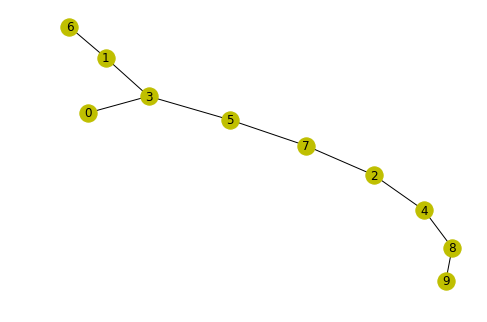

In [33]:
nx.draw(T, **opts)

##  Code Corner

### `python`

* `[].pop` [[doc]](https://docs.python.org/2/tutorial/datastructures.html)

* `[].extend`  [[doc]](https://docs.python.org/2/tutorial/datastructures.html)

### `networkx`

* `connected_components` [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/component.html)

* `random_tree` [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.trees.random_tree.html)

* `empty_graph` [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html)

## `matplotlib`

* `subplot`: [[doc]](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)

## `random`

* `choice` [[doc]](https://docs.python.org/3/library/random.html#functions-for-sequences)

## Exercises

1.  A tree $T$ uniquely determines its Prüfer code,
and hence the two nodes that remain after (destructively)
computing the code.   What are those two nodes, in terms of
properties of $T$, or its Prüfer code?

2. What tree has Prüfer code $(0, 1, 2, \dots, n-3)$?